In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample


In [111]:
# Load the dataset
df = pd.read_csv('graduate_admission.csv')

## Exploratory Data Analysis

In [140]:
# Display the first few rows of the dataset
print(df.head(5))

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0         1.0      337.0        118.0                4.0  4.5   4.5  9.65   
1         2.0      324.0        107.0                4.0  4.0   4.5  8.87   
2         3.0      316.0        104.0                3.0  3.0   3.5  8.00   
3         4.0      322.0        110.0                3.0  3.5   2.5  8.67   
4         5.0      314.0        103.0                2.0  2.0   3.0  8.21   

   Research  Chance of Admit   
0       1.0              0.92  
1       1.0              0.76  
2       1.0              0.72  
3       1.0              0.80  
4       0.0              0.65  


In [113]:
# Get the summary statistics of the dataset
print(df.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

In [114]:
# Get the information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [115]:
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
495         1              0.87  
496         1              0.96  
497         1              0.93  
498         0              0.73  
499         0              0.84  

[500 rows x 9 columns]

## DATA VISUALIZATION

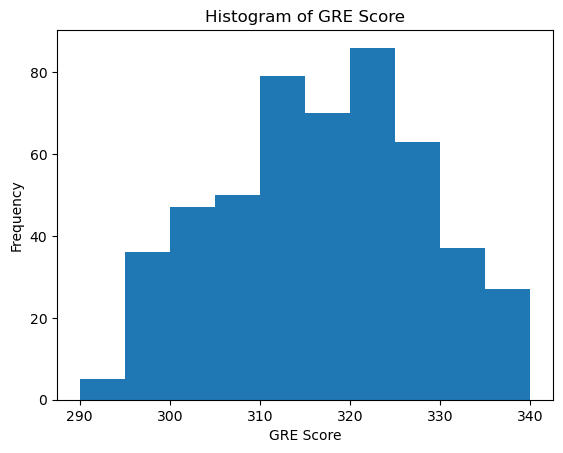

In [116]:
# Histogram of a numerical variable
plt.hist(df['GRE Score'])
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.title('Histogram of GRE Score')
plt.show()

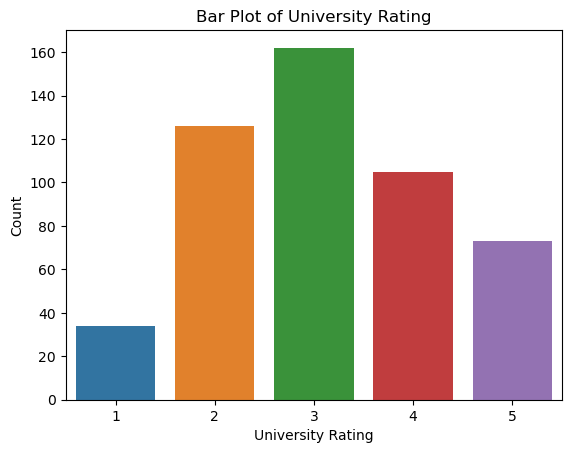

In [117]:
# Bar plot of a categorical variable
sns.countplot(x='University Rating', data=df)
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.title('Bar Plot of University Rating')
plt.show()

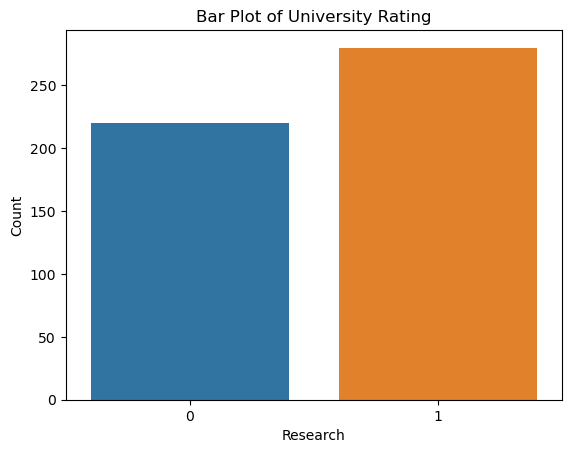

In [118]:
# Bar plot of a categorical variable
sns.countplot(x='Research', data=df)
plt.xlabel('Research')
plt.ylabel('Count')
plt.title('Bar Plot of University Rating')
plt.show()

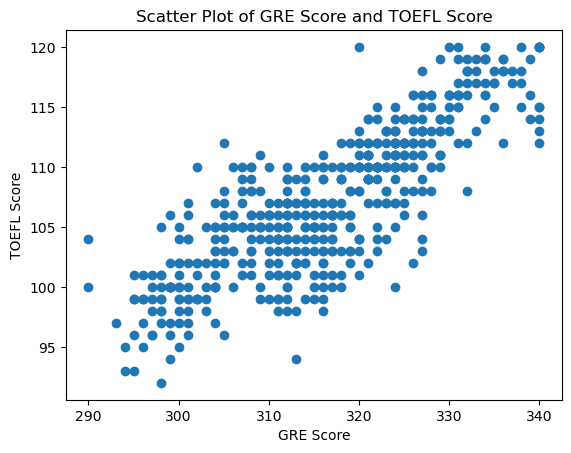

In [119]:
# Scatter plot of two numerical variables
plt.scatter(df['GRE Score'], df['TOEFL Score'])
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.title('Scatter Plot of GRE Score and TOEFL Score')
plt.show()

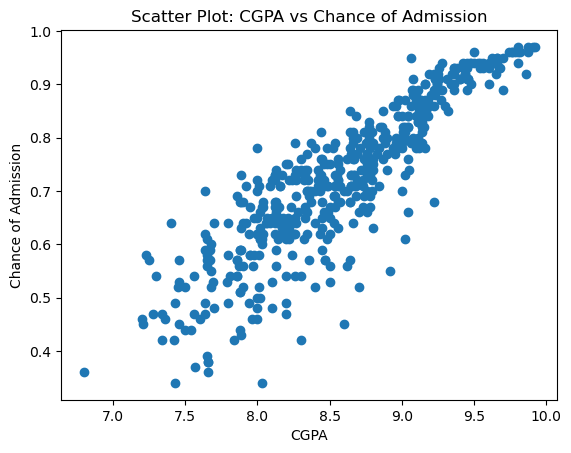

In [120]:
# Scatter plot of CGPA and Chance of Admission
plt.scatter(df['CGPA'], df['Chance of Admit '])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admission')
plt.title('Scatter Plot: CGPA vs Chance of Admission')
plt.show()

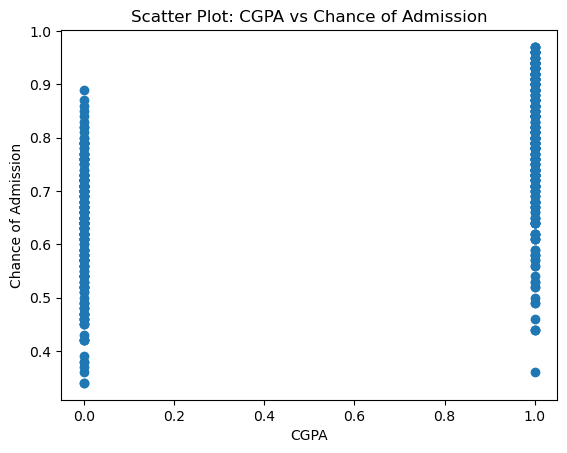

In [121]:
# Scatter plot of CGPA and Chance of Admission
plt.scatter(df['Research'], df['Chance of Admit '])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admission')
plt.title('Scatter Plot: CGPA vs Chance of Admission')
plt.show()

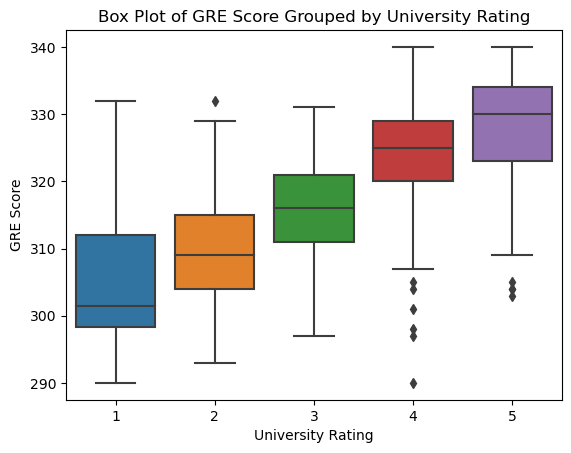

In [122]:
# Box plot of a numerical variable grouped by a categorical variable
sns.boxplot(x='University Rating', y='GRE Score', data=df)
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.title('Box Plot of GRE Score Grouped by University Rating')
plt.show()

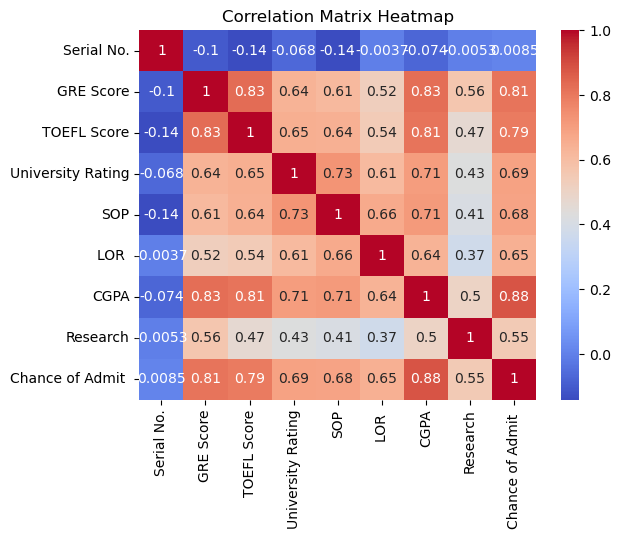

In [123]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


## PREPROCESSING

In [124]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [125]:
#confirm if missing values exist
df.isnull().any().any() 

False

In [126]:
# Remove duplicate instances
df = df.drop_duplicates()


In [127]:
# Check for and remove duplicate instances
df.duplicated().any() #checking for duplicate

False

In [128]:
# Outlier detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
df = df[~outliers.any(axis=1)]
df #reduced from 500 to 491

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1.0      337.0        118.0                4.0  4.5   4.5  9.65   
1           2.0      324.0        107.0                4.0  4.0   4.5  8.87   
2           3.0      316.0        104.0                3.0  3.0   3.5  8.00   
3           4.0      322.0        110.0                3.0  3.5   2.5  8.67   
4           5.0      314.0        103.0                2.0  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495       496.0      332.0        108.0                5.0  4.5   4.0  9.02   
496       497.0      337.0        117.0                5.0  5.0   5.0  9.87   
497       498.0      330.0        120.0                5.0  4.5   5.0  9.56   
498       499.0      312.0        103.0                4.0  4.0   5.0  8.43   
499       500.0      327.0        113.0                4.0  4.5   4.5  9.04   

     Research  Chance of Admit   
0         1.0              0.92  
1         1.0              0.76  
2         1.0              0.72  
3         1.0              0.80  
4         0.0              0.65  
..        ...               ...  
495       1.0              0.87  
496       1.0              0.96  
497       1.0              0.93  
498       0.0              0.73  
499       0.0              0.84  

[497 rows x 9 columns]

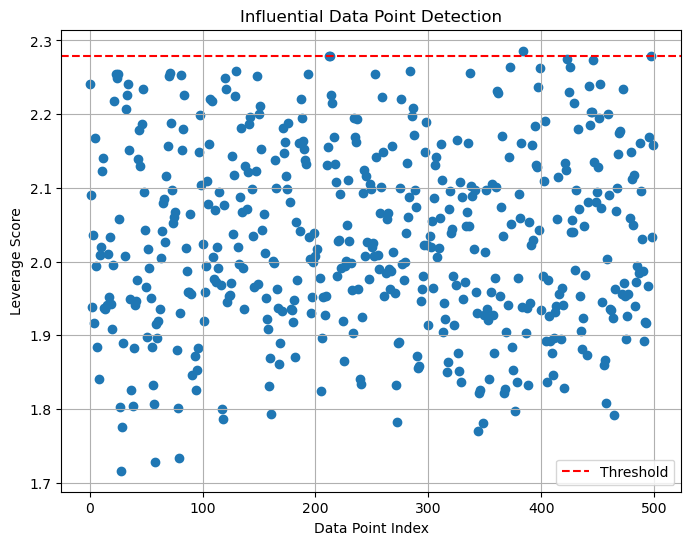

In [138]:
# Influential data point detection using leverage scores
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df.drop('Chance of Admit ', axis=1), df['Chance of Admit '])
leverage_scores = pd.Series(np.sum(df.drop('Chance of Admit ', axis=1) * lm.coef_, axis=1), index=df.index)

# Calculate leverage scores
leverage_scores = pd.Series(np.sum(df.drop('Chance of Admit ', axis=1) * lm.coef_, axis=1), index=df.index)

# Filter out influential data points based on leverage scores
mean_leverage = np.mean(leverage_scores)
std_leverage = np.std(leverage_scores)

# Plot leverage scores
plt.figure(figsize=(8, 6))
plt.scatter(df.index, leverage_scores)
plt.axhline(mean_leverage + 2 * std_leverage, color='r', linestyle='--', label='Threshold')
plt.xlabel('Data Point Index')
plt.ylabel('Leverage Score')
plt.title('Influential Data Point Detection')
plt.legend()
plt.grid(True)
plt.show()

df = df[leverage_scores < np.mean(leverage_scores) + 2 * np.std(leverage_scores)]

In [139]:
# Checking normality of features
from scipy.stats import shapiro

for column in df.columns:
    _, p_value = shapiro(df[column])
    if p_value < 0.05:
        print(f"{column}: Not normally distributed (p-value={p_value})")
    else:
        print(f"{column}: Normally distributed (p-value={p_value})")


Serial No.: Not normally distributed (p-value=3.451001984178248e-11)
GRE Score: Not normally distributed (p-value=0.0001972190075321123)
TOEFL Score: Not normally distributed (p-value=0.00014120939886197448)
University Rating: Not normally distributed (p-value=2.4386377659960806e-16)
SOP: Not normally distributed (p-value=1.654976017340104e-10)
LOR : Not normally distributed (p-value=2.6457535814983224e-11)
CGPA: Not normally distributed (p-value=0.0053011104464530945)
Research: Not normally distributed (p-value=4.298794595900614e-31)
Chance of Admit : Not normally distributed (p-value=3.969795670855092e-06)


In [131]:
# Splitting into training and testing sets
# Handling class imbalance using Mahal-KNN
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']


## OVERSAMPLING TO ADDRESS CLASS IMBALANCE

In [132]:
# Combining X and y for oversampling
df_resample = pd.concat([X, y], axis=1)

# Splitting the dataset into minority and majority classes
minority_class = df_resample[df_resample['Chance of Admit '] < 0.5]
majority_class = df_resample[df_resample['Chance of Admit '] >= 0.5]

# Random oversampling the minority class
minority_oversampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combining the oversampled minority class with the majority class
df_resampled = pd.concat([majority_class, minority_oversampled])

# Splitting into features (X_resampled) and target variable (y_resampled)
X_resampled = df_resampled.drop('Chance of Admit ', axis=1)
y_resampled = df_resampled['Chance of Admit ']

# Splitting into training and testing sets using the resampled dataset
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("X_train_resampled: ", X_train_resampled.shape)
print("X_test_resampled: ", X_test_resampled.shape)
print("y_train_resampled: ", y_train_resampled.shape)
print("y_test_resampled: ", y_test_resampled.shape)

X_train_resampled:  (732, 8)
X_test_resampled:  (184, 8)
y_train_resampled:  (732,)
y_test_resampled:  (184,)


In [133]:
scaler = StandardScaler()

# Scale the features in the resampled training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
# y_train_resampled_scaled = scaler.fit_transform(y_train_resampled)

# Scale the features in the resampled testing data
X_test_resampled_scaled = scaler.transform(X_test_resampled)

print("X_train_resampled_scaled:", X_train_resampled_scaled.shape)
print("X_test_resampled_scaled: ", X_test_resampled_scaled.shape)
print("y_train_resampled_scaled: ", y_train_resampled.shape)



X_train_resampled_scaled: (732, 8)
X_test_resampled_scaled:  (184, 8)
y_train_resampled_scaled:  (732,)


In [134]:
# Create DataFrame with feature names
feature_names = X.columns.tolist()
X_train_resampled_scaled_df = pd.DataFrame(X_train_resampled_scaled, columns=feature_names)
X_test_resampled_scaled_df = pd.DataFrame(X_test_resampled_scaled, columns=feature_names)

X_train_pca:  (732, 6)
X_test_pca:  (184, 6)
y_train_resampled:  (732,)


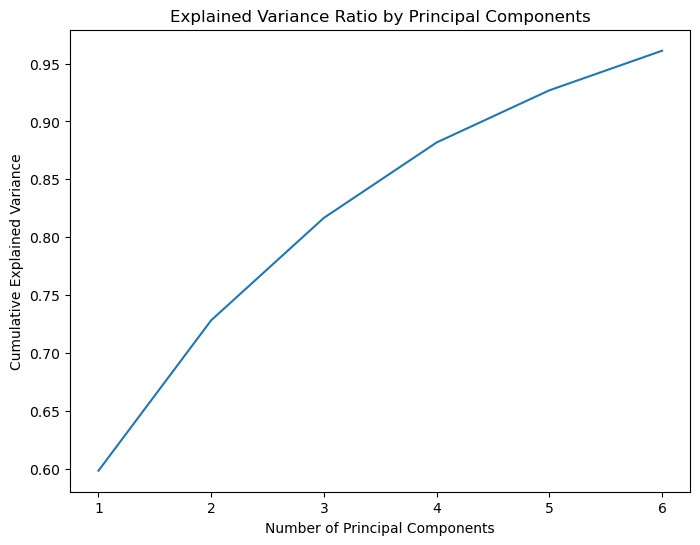

In [135]:
# # Feature selection using PCA and SelectKBest
pca = PCA(n_components=0.95) #reduces dimensionality but retains as much info as possible
X_train_pca = pca.fit_transform(X_train_resampled_scaled_df)
X_test_pca = pca.transform(X_test_resampled_scaled_df)

print("X_train_pca: ", X_train_pca.shape)
print("X_test_pca: ", X_test_pca.shape)
print("y_train_resampled: ", y_train_resampled.shape)

# Visualize explained variance ratio by principal components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

## MODEL SELECTION AND TRAINING

In [136]:
# Training and evaluating regression models
regression_models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor()
}

for model_name, model in regression_models.items():
    model.fit(X_train_pca, y_train_resampled)
    
    scores = cross_val_score(model, X_train_pca, y_train_resampled, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    r2_scores = cross_val_score(model,  X_train_pca, y_train_resampled, cv=5, scoring='r2')

#      # Evaluating the model on the testing data i.e pricting to using test data to see how accurate our model is
    y_pred = model.predict(X_test_pca)
    
    #now the predicted is used with the target test sample to measure various parameters
    mse = mean_squared_error(y_test_resampled, y_pred)
    r2 = r2_score(y_test_resampled, y_pred)
    mae = mean_absolute_error(y_test_resampled, y_pred)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(y_test_resampled, y_pred)
    medae = median_absolute_error(y_test_resampled, y_pred)

    print(f"\n{model_name} Model:")
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Mean Absolute Error:", mae)
    print("R-squared Score:", r2)
    print("Explained Variance Score:", evs)
    print("Median Absolute Error:", medae)
    
    # Creating a hold-out dataset for predictions
    X_holdout_scaled = pd.DataFrame(scaler.transform(X_resampled), columns=X_resampled.columns)
    # X_holdout_k_best = k_best.transform(X_holdout_scaled)
    X_holdout_pca_best = pca.transform(X_holdout_scaled)

    y_holdout_pred = model.predict(X_holdout_pca_best)
    holdout_predictions = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_holdout_pred})
    print(holdout_predictions.head())

    
   
    
    
    



Decision Tree Model:
Mean Squared Error: 0.0029749999999999993
Root Mean Squared Error: 0.054543560573178565
Mean Absolute Error: 0.027608695652173953
R-squared Score: 0.911747916378799
Explained Variance Score: 0.9123086832204454
Median Absolute Error: 3.3306690738754696e-16
   Actual  Predicted
0    0.92       0.92
1    0.76       0.76
2    0.72       0.72
3    0.80       0.80
4    0.65       0.65

Random Forest Model:
Mean Squared Error: 0.0019500315760869547
Root Mean Squared Error: 0.04415916185897276
Mean Absolute Error: 0.024517934782608882
R-squared Score: 0.9421531597590561
Explained Variance Score: 0.9425205113264826
Median Absolute Error: 0.0023499999999996857
   Actual  Predicted
0    0.92     0.9269
1    0.76     0.7724
2    0.72     0.6749
3    0.80     0.7502
4    0.65     0.6247

KNN Model:
Mean Squared Error: 0.002549956521739131
Root Mean Squared Error: 0.05049709419104362
Mean Absolute Error: 0.027413043478260887
R-squared Score: 0.9243566466598493
Explained Varianc

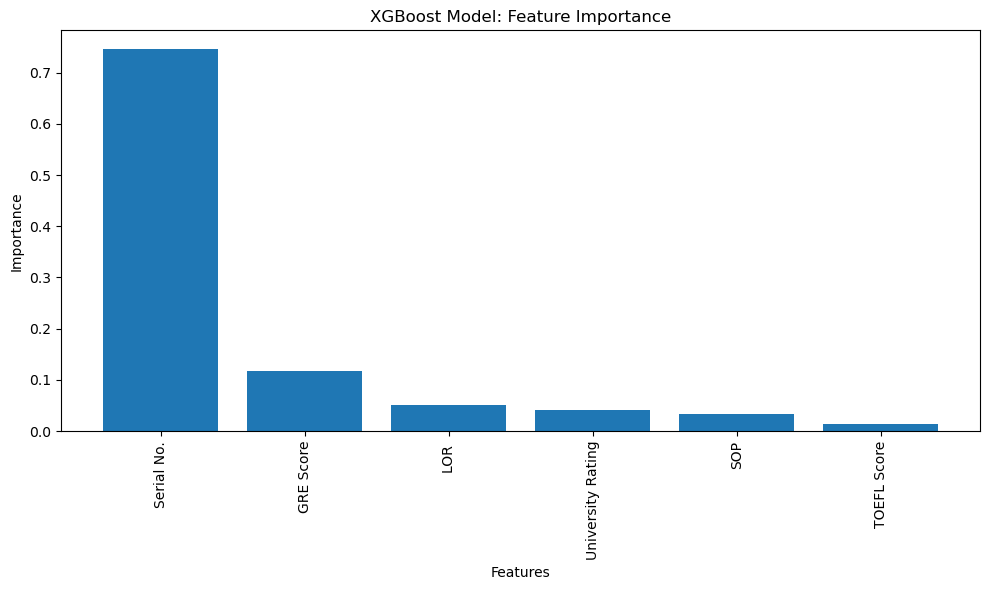

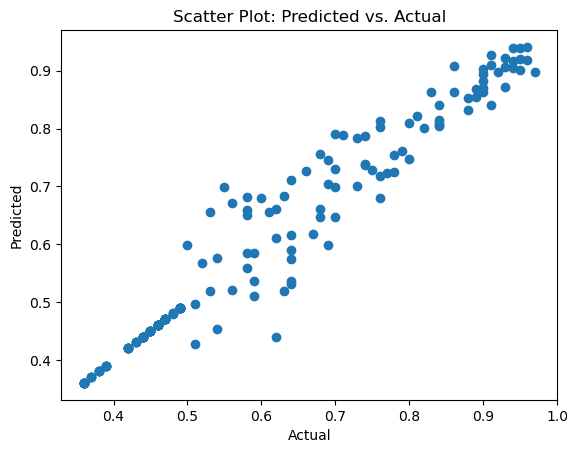

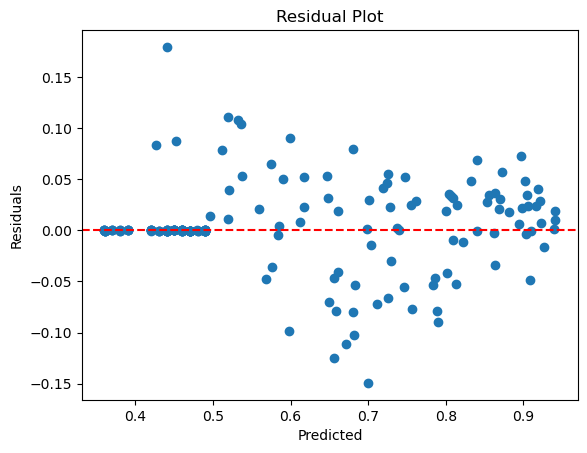

In [137]:
 # Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances)
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'{model_name} Model: Feature Importance')
plt.tight_layout()
plt.show()

# Scatter plot of predicted vs. actual values
plt.scatter(y_test_resampled, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter Plot: Predicted vs. Actual")
plt.show()
    
    # Residual plot
residuals = y_test_resampled - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()